In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pycountry
import re
import geopandas as gpd
import lxml
import plotly.express as px

In [3]:
BINDING_DATASET = "BindingDB_All.tsv"
# bindingDB = pd.read_csv(BINDING_DATASET, sep='\t', nrows = 1000000)
# bindingDB.head()

In [4]:
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    # 'Ki (nM)',
    # 'IC50 (nM)',
    # 'Kd (nM)',
    # 'EC50 (nM)',
    # 'kon (M-1-s-1)',
    # 'koff (s-1)',
    # 'pH',
    # 'Temp (C)',
    "Curation/DataSource",
    # 'Article DOI',
    # 'BindingDB Entry DOI',
    # 'PMID',
    # 'PubChem AID',
    "Patent Number",
    "Authors",
    "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    # 'ChEBI ID of Ligand',
    # 'ChEMBL ID of Ligand',
    'DrugBank ID of Ligand',
    # 'IUPHAR_GRAC ID of Ligand',
    # 'KEGG ID of Ligand',
    # 'ZINC ID of Ligand',
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    # 'UniProt (SwissProt) Primary ID of Target Chain',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    # 'UniProt (TrEMBL) Primary ID of Target Chain',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [22]:
bindingDB_all = pd.read_csv(BINDING_DATASET, sep='\t', on_bad_lines='skip', usecols = usecols)

# bindingDB_HS = bindingDB_all[bindingDB_all['Target Source Organism According to Curator or DataSource']=='Homo sapiens']

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_63562/3604030247.py:1: DtypeWarning: Columns (21,22,23,33) have mixed types. Specify dtype option on import or set low_memory=False.
  bindingDB_all = pd.read_csv(BINDING_DATASET, sep='\t', on_bad_lines='skip', usecols = usecols)


In [57]:
bindingDB[['Institution']].value_counts()


Institution                            
Merck Sharp & Dohme Corp                   39210
Burnham Center for Chemical Genomics       38634
Janssen Pharmaceutica NV                   37115
Bristol-Myers Squibb Co.                   32372
Novartis AG                                32190
                                           ...  
Chemocentryx                                   1
Innovative Therapeutics Lab                    1
Indian Institute of Chemical Technology        1
Sanofi Oncology                                1
University of Lisbon                           1
Name: count, Length: 2507, dtype: int64

In [58]:
# institutions = bindingDB['Institution'].unique().tolist()
# df_institutions = pd.DataFrame(institutions, columns=['institution']).sample(10)

In [59]:
# #!pip install pandas geopy
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import time

# geolocator = Nominatim(user_agent="geo_institution_locator")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# def get_place(institution):
#     try:
#         location = geocode(institution)
#         if location:
#             return location.address, location.latitude, location.longitude
#         else:
#             return None, None, None
#     except Exception as e:
#         print(f"Error geocoding {institution}: {e}")
#         return None, None, None

#df_institutions['address'], df_institutions['latitude'], df_institutions['longitude'] = zip(*df_institutions['institution'].apply(get_place))
#df_institutions


In [23]:
bindingDB_sample = bindingDB.sample(100000)

In [33]:
def get_location(doi):
    """
    Get affiliated institution location based on a DOI

    :doi: str, DOI of article

    return: location (str)
    """
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        authors = data.get('message', {}).get('author', [])
        if authors:
            main_author = authors[-1]
            affiliation_info = main_author.get('affiliation', [])
            if affiliation_info:
                location = affiliation_info[0].get('name', 'No location found')
                return location
            else:
                return 'No affiliation found'
        else:
            return 'No authors found'
    
    else:
        return f"Error: {response.status_code}"

def add_location(df):
    """
    Add affiliated institution location to dataframes

    :df: dataframe containing a column of DOIs TITLED "Article DOI"

    return: new Pandas.Dataframe with an additional "Affiliated Location" column
    """
    #group all identical DOIs together and get their affiliated institution location
    pub_counts = df["Article DOI"].value_counts().to_frame().reset_index()
    pub_counts["Affiliated Location"] = pub_counts["Article DOI"].apply(get_location)

    #final dataframe with date of publications
    return df.merge(pub_counts, on='Article DOI', how='left')

#bindingDB_sample = add_location(bindingDB_sample)
locations = []
for doi in bindingDB_sample['Article DOI'].unique():
    locations.append(get_location(doi))

In [25]:
n=0
for i in locations:
    if i == 'No affiliation found':
        n = n+1
print(n/len(locations))

0.5605095541401274


In [36]:
DF_locations = pd.DataFrame(locations, columns=["location"])
DF_locations['country'] = None

us_states = {
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
}

def fct_extract_country(affiliation):
    if not isinstance(affiliation, str):
        return None
    cleaned_affiliation = re.sub(r'\b[A-Z]{1,2}\d{1,4}[A-Z]{0,2}\b', '', affiliation)
    for state in us_states: # checks if US state present and map it to USA (some addresses from USA only have the state and not the country)
        if state in cleaned_affiliation:
            return "United States of America"
    # Matches countries in pyountry database (standardized country names in english):
    countries = []
    for country in pycountry.countries:
        if country.name in cleaned_affiliation or (country.alpha_2 in cleaned_affiliation or country.alpha_3 in cleaned_affiliation):
            countries.append(country.name)
    if countries: # returns the first matching country or None if no match
        return countries[0]
    return None

DF_locations.loc[DF_locations['location'] != "No affiliation found", 'country'] = DF_locations['location'].apply(fct_extract_country)

m=0
for j in DF_locations['country']:
    if j == None:
        m = m+1
print(m/len(DF_locations['country']))

In [27]:
countries = DF_locations['country'].to_list()
sorted_countries_DF = pd.DataFrame(countries, columns=['NAME'])
country_counts_ = sorted_countries_DF['NAME'].value_counts()
sorted_countries_DF['counts'] = sorted_countries_DF['NAME'].map(country_counts_)
sorted_countries_DF = sorted_countries_DF.sort_values(by='counts', ascending = False).dropna()

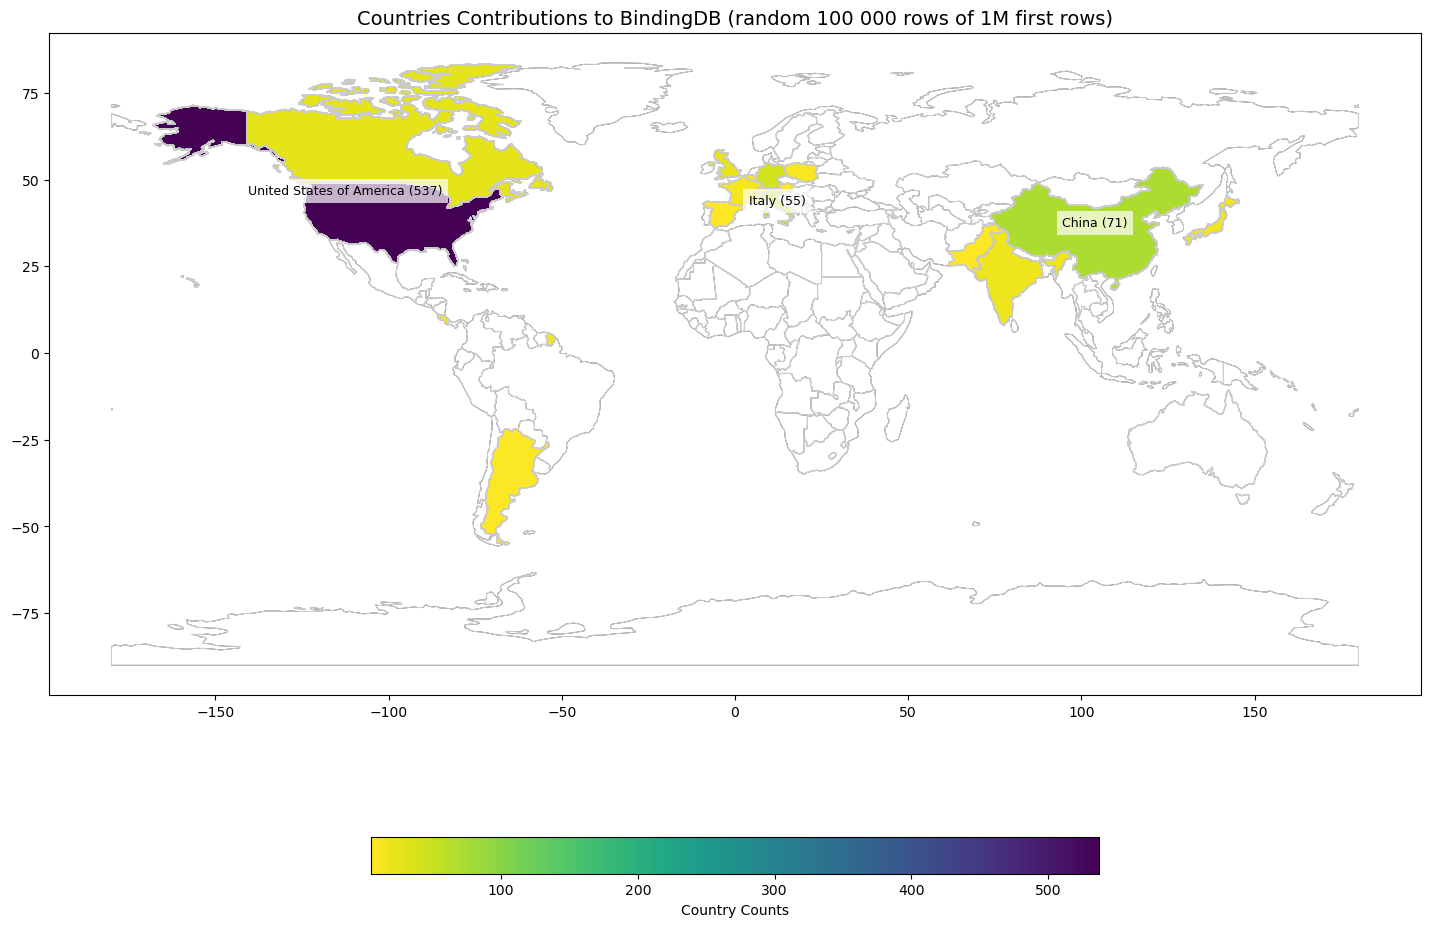

In [28]:
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

world = world.merge(sorted_countries_DF[['NAME', 'counts']], on='NAME', how='left')
world['counts'] = world['counts'].fillna(0)
world['NAME'].to_list()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.8, color='#cccccc')  
cmap = plt.get_cmap('viridis_r')
cmap.set_under('white')
world.plot(column='counts', ax=ax, legend=True, cmap=cmap, vmin=5.1, 
           legend_kwds={'label': "Country Counts",
                        'orientation': "horizontal",
                        'shrink': 0.5},
           edgecolor='black', linewidth=0.5)

world_unique = world.drop_duplicates(subset='NAME')
top_countries = world_unique.nlargest(3, 'counts')

for idx, row in top_countries.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, f"{row['NAME']} ({int(row['counts'])})", 
            fontsize=9, ha='center', color='black', 
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title("Countries Contributions to BindingDB (random 100 000 rows of 1M first rows)", fontsize=14)
plt.tight_layout() 
plt.show()

### Diseases classification

In [8]:
drugbank = pd.read_xml("full database.xml")

In [4]:
drugbank['indication'].to_list()

['Lepirudin is indicated for anticoagulation in adult patients with acute coronary syndromes (ACS) such as unstable angina and acute myocardial infarction without ST elevation. In patients with ACS, lepirudin is intended for use with [aspirin].[L41539] Lepirudin is also indicated for anticoagulation in patients with heparin-induced thrombocytopenia (HIT) and associated thromboembolic disease in order to prevent further thromboembolic complications.[L41539]',
 'Cetuximab indicated for the treatment of locally or regionally advanced squamous cell carcinoma of the head and neck in combination with radiation therapy. It is indicated for treating a recurrent locoregional disease or metastatic squamous cell carcinoma of the head and neck in combination with platinum-based therapy with fluorouracil. It is indicated for recurrent or metastatic squamous cell carcinoma of the head and neck progressing after platinum-based therapy.[L30448]\r\n\r\nCetuximab is also indicated for K-Ras wild-type, E

In [10]:
df = bindingDB_all.dropna(subset=['DrugBank ID of Ligand'])
df = df.drop_duplicates(subset = 'DrugBank ID of Ligand')

In [11]:
def drugbank_therapeutic_area(drugbank_id):
    indications = drugbank[drugbank['drugbank-id'] == drugbank_id]['indication'] 
    if indications.empty:
        return None
    else:
        return indications.iloc[0]

df['Therapeutic Area'] = df['DrugBank ID of Ligand'].apply(drugbank_therapeutic_area)

In [12]:
m=0
for j in df['Therapeutic Area']:
    if j == None:
        m = m+1
print(m/len(df['Therapeutic Area']))

0.8814984709480123


In [13]:
diseases_list = df['Therapeutic Area'].to_list()
diseases_list = [x for x in diseases_list if x is not None]
diseases_list

['Ellagic acid is being investigated for use in follicular lymphoma, brain injury in intrauterine growth restricted babies, obese adolescents, and solar lentigines.',
 'Bosutinib is indicated for the treatment of adult and pediatric patients 1 year of age and older with chronic phase Philadelphia chromosome-positive chronic myelogenous leukemia that is newly diagnosed or resistant or intolerant to prior therapy. It is also indicated for the treatment of adult patients with accelerated or blast phase Philadelphia chromosome-positive chronic myelogenous leukemia that is newly diagnosed or resistant or intolerant to prior therapy.[L48355]',
 'Vandetanib is currently approved as an alternative to local therapies for both unresectable and disseminated disease. Because Vandetanib can prolong the Q-T interval, it is contraindicated for use in patients with serious cardiac complications such as congenital long QT syndrome and uncompensated heart failure. ',
 'For the treatment of HIV-1 infecti

In [16]:
# plt.figure(figsize=(30,20))
# sns.barplot(data=disease_count_df, x='Count', y='Disease', palette='viridis')
# plt.title('Disease Counts')
# plt.xlabel('Count')
# plt.ylabel('Disease')
# plt.tight_layout()
# plt.show()

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_63562/1231291344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=organisms.index, y=organisms.values, palette="viridis")


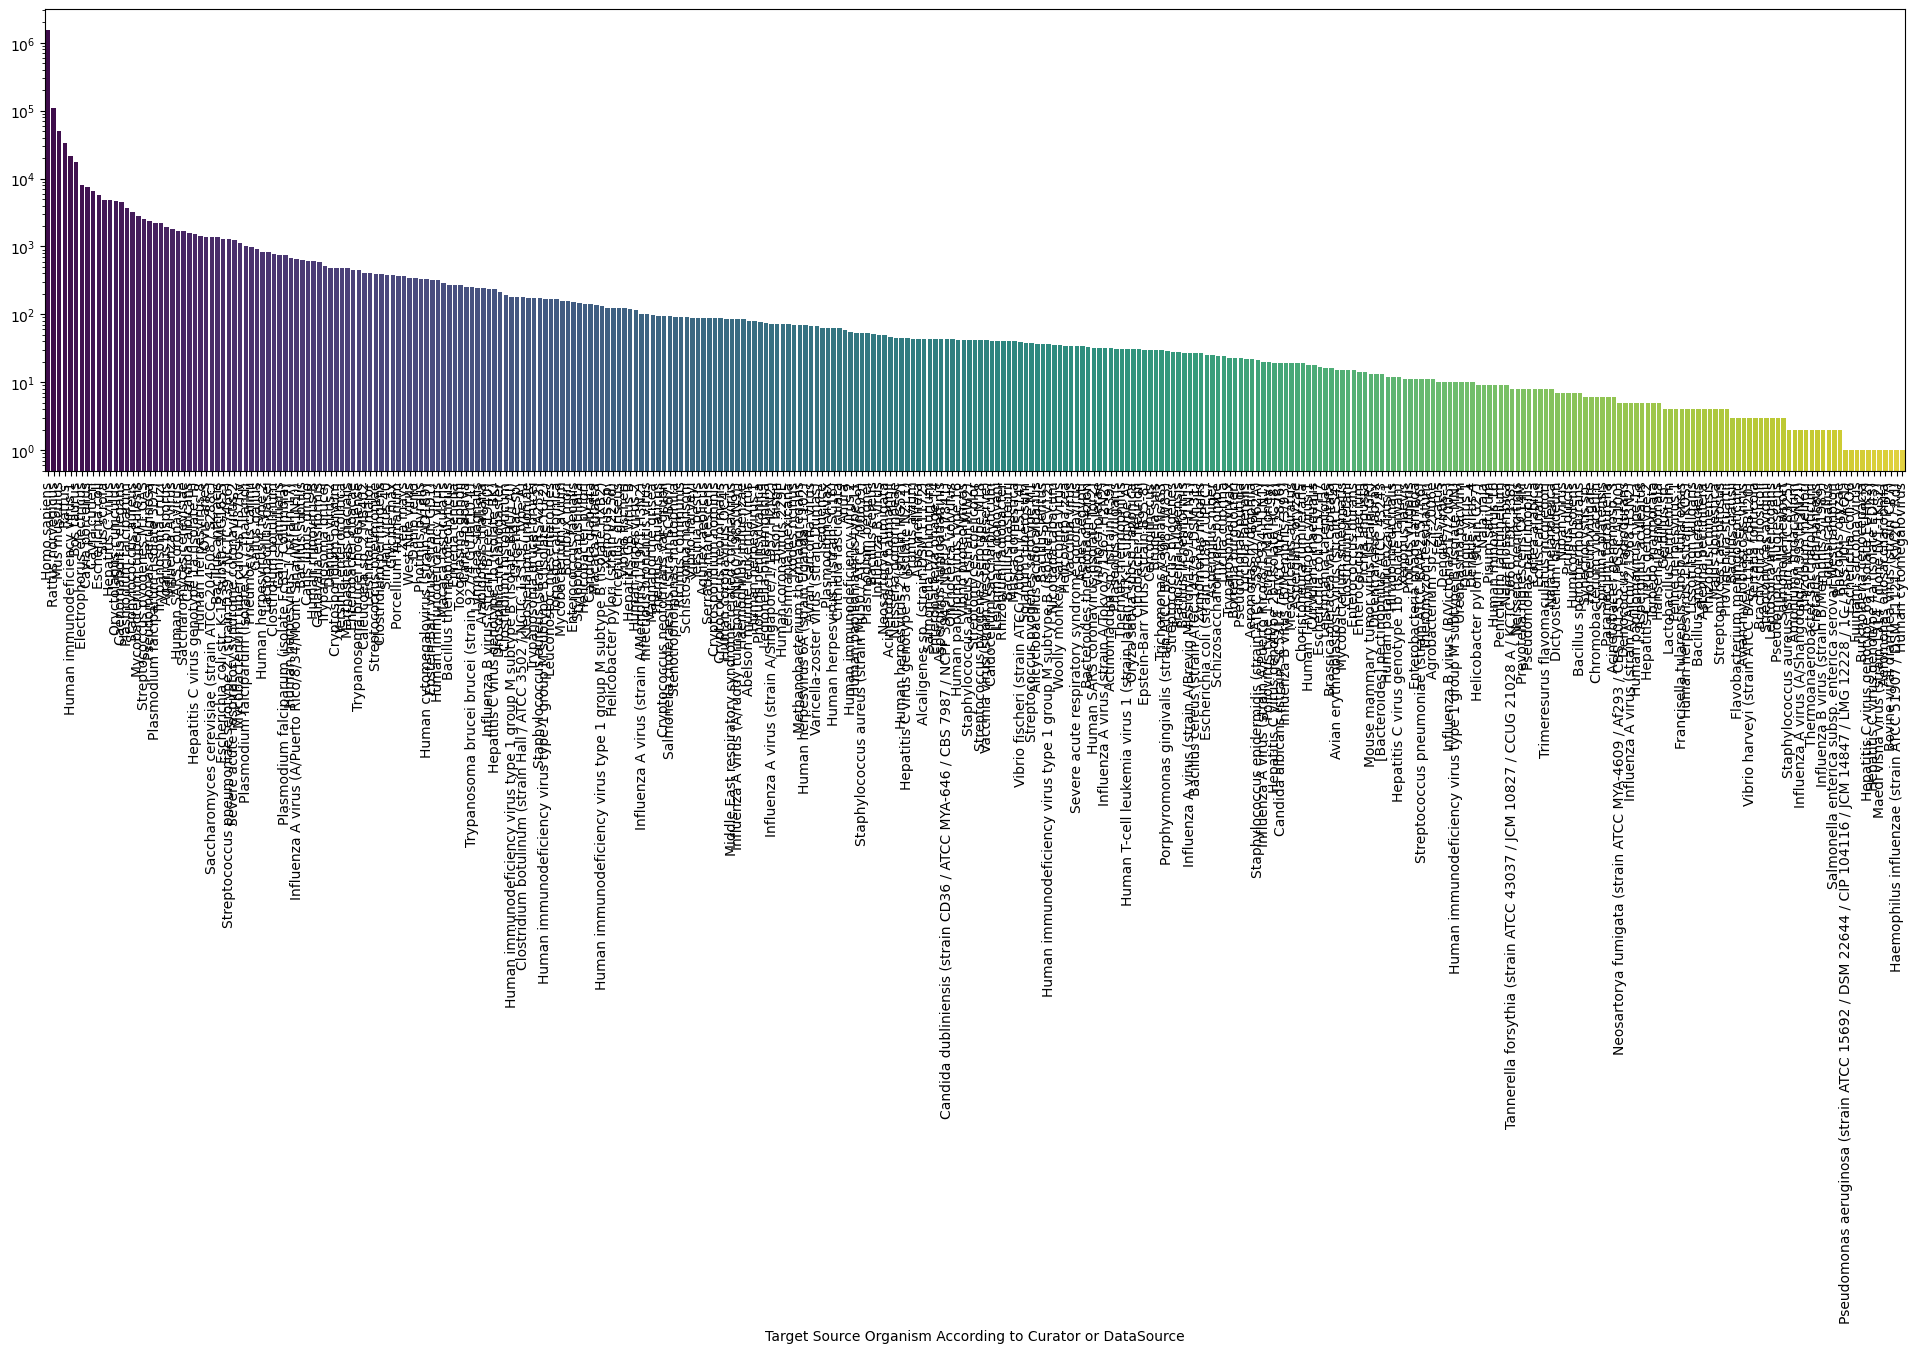

In [8]:
organisms = bindingDB_all['Target Source Organism According to Curator or DataSource'].value_counts()
plt.figure(figsize=(24,6))
sns.barplot(x=organisms.index, y=organisms.values, palette="viridis")
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [96]:
df2 = bindingDB.dropna(subset=['Article DOI']).sample(10000)

In [98]:
df2 = add_location(df2)

In [99]:
df2.loc[df2['Affiliated Location'] != "No affiliation found", 'country'] = df2['Affiliated Location'].apply(fct_extract_country)


In [100]:
pivot_df2 = df2.pivot_table(
    index='Target Source Organism According to Curator or DataSource', 
    columns='country', 
    aggfunc='size', 
    fill_value=0
)

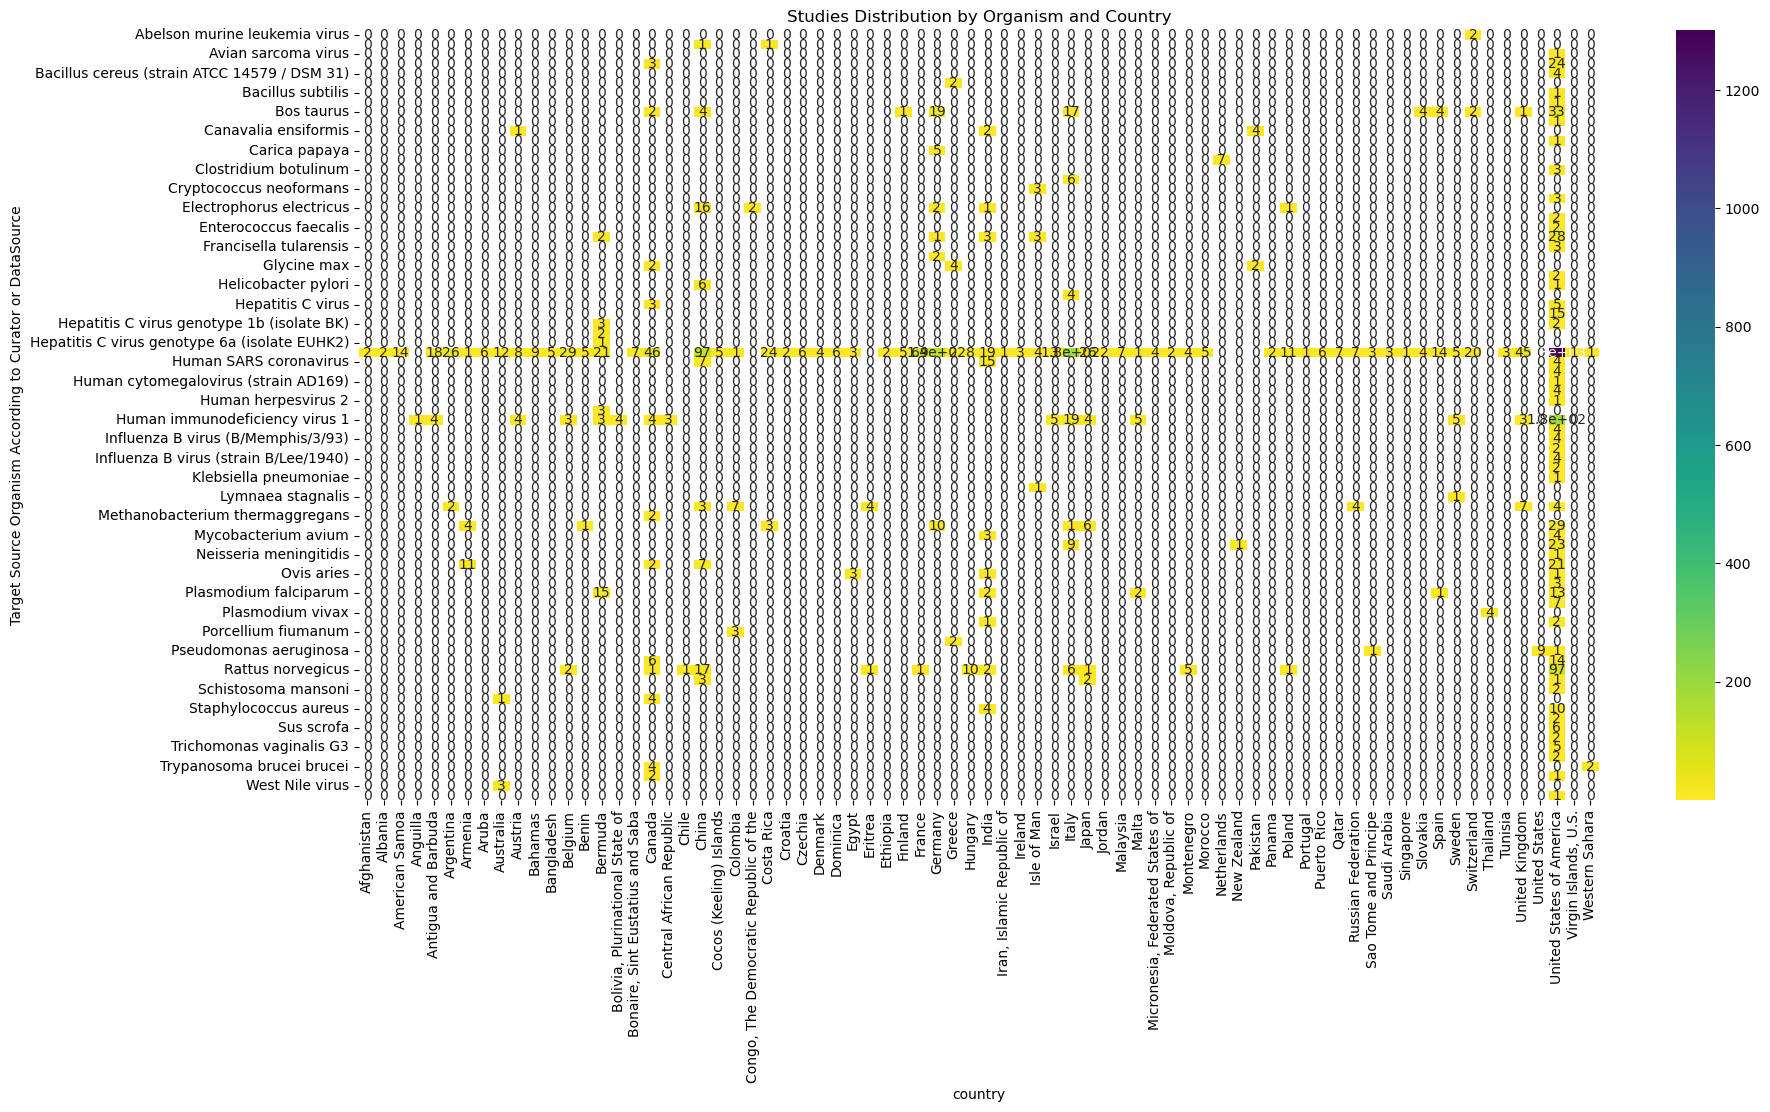

In [101]:
plt.figure(figsize=(20, 10))
cmap = plt.get_cmap('viridis_r')
cmap.set_under('white')
sns.heatmap(pivot_df2, annot=True, cmap=cmap, vmin=0.01)
plt.title("Studies Distribution by Organism and Country")
plt.show()

In [102]:
import plotly.express as px

country_counts = df2.groupby(['country', 'Target Source Organism According to Curator or DataSource']).size().reset_index(name='Count')
max_organism_countries = country_counts.loc[country_counts.groupby('country')['Count'].idxmax()]

fig = px.choropleth(
    max_organism_countries,
    locations="country",
    locationmode='country names',
    color="Count",
    hover_name="Target Source Organism According to Curator or DataSource"
)
fig.show()

### Cleaning organisms :

In [48]:
bindingDB_all['Target Source Organism According to Curator or DataSource'].value_counts()

bindingDB_all['Target Source Organism According to Curator or DataSource'] = bindingDB_all['Target Source Organism According to Curator or DataSource'].str.lower()
bindingDB_all['Target Source Organism According to Curator or DataSource'] = bindingDB_all['Target Source Organism According to Curator or DataSource'].str.strip()
replacements = {
    'human': 'homo sapiens',
    'h. sapiens': 'homo sapiens',
    'mouse': 'mus musculus',
    'm. musculus': 'mus musculus',
    'rattus' : 'rattus norvegicus',
    'r. norvegicus' : 'rattus norvegicus',
}

bindingDB_all['Target Source Organism According to Curator or DataSource'] = bindingDB_all['Target Source Organism According to Curator or DataSource'].replace(replacements)

bindingDB_all = bindingDB_all.dropna(subset=['Target Source Organism According to Curator or DataSource'])

In [49]:
bindingDB_all['Target Source Organism According to Curator or DataSource'].value_counts()

Target Source Organism According to Curator or DataSource
homo sapiens                                     1541025
rattus norvegicus                                 143476
mus musculus                                       49854
human immunodeficiency virus 1                     21780
bos taurus                                         17618
                                                  ...   
escherichia coli o6                                    1
burkholderia cenocepacia                               1
bovine viral diarrhea virus (strain cp7)               1
fujinami sarcoma virus                                 1
hepatitis c virus genotype 6a (isolate euhk2)          1
Name: count, Length: 328, dtype: int64

In [81]:
organisms = bindingDB_all['Target Source Organism According to Curator or DataSource'].value_counts()
N = 10
top_organisms = organisms[:N]
other_count = organisms[N:].sum()
top_organisms['Others'] = other_count
top_organisms_df = top_organisms.reset_index()
top_organisms_df.columns = ['Organism', 'Count']
top_organisms_df['Organism'] = top_organisms_df['Organism'].str.title()


fig = px.bar(top_organisms_df, x='Organism', y='Count', title=f'Top {N} Organisms', 
             labels={'Count': 'Count', 'Organism': 'Organism'}, 
             color='Organism', 
             text='Count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)

fig.show()


In [83]:
total_sum = top_organisms_df[top_organisms_df['Organism'] != 'Others']['Count'].sum()
top_organisms_df['Percentage'] = (top_organisms_df['Count']/total_sum)*100

In [84]:
fig = px.bar(top_organisms_df, x='Organism', y='Percentage', title=f'Top {N} Organisms', 
             labels={'Percentage': 'Percentage', 'Organism': 'Organism'}, 
             color='Organism', 
             text='Percentage')
fig.update_traces(texttemplate='%{text:.2}%', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)

fig.show()